In [40]:
#### Agglomeration of communities ####

import pandas as pd 
import os 
from datetime import datetime 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

import numpy as np

In [166]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#000000']
cts = ['Alt MAC', 'B cell', 'Cancer', 'Cl MAC', 'Cl Mo', 'DCs cell', 'Endothelial cell', 'Int Mo', 'Mast cell', 'NK cell', 'Neutrophils','Non-Cl Mo', 'T other', 'Tc', 'Th', 'Treg', 'Unknown']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'maroon', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'brown', 'navy', 'aqua', 'teal']


In [142]:

# date = datetime.now().strftime("%Y%m%d")

# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

# Set path 
output_dir = f"{data_path}/clustered/agglomerate_communities_python/"


data = pd.read_csv(f"{data_path}clustered/{file}", index_col=0)
df = data.iloc[:,3:]
df

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [92]:
#### Agglomerative clustering function ####

def agglomerative_clustering(k, average_neighbours, avg_noCluster, agglomerate_to):
    
    # Agglomerative clustering to chosen number of communities as determined by own biological knowledge of the data
    ac1 = AgglomerativeClustering(linkage = 'average', n_clusters = agglomerate_to)
    agglomerate1 = pd.DataFrame(ac1.fit_predict(avg_noCluster))
    # Rename column
    agglomerate1.columns = [f"agglomerateto_{agglomerate_to}"]
    agglomerate1[f"agglomerateto_{agglomerate_to}"] += 1
    # Add agglomerated data to average neighbours 
    average_neighbours = average_neighbours.join(agglomerate1)
   
    print(list(average_neighbours))
    
    # Save data with added columns 
    average_neighbours.to_csv(f"{data_path}clustered/reclustered_{agglomerate_to}.csv", index = False)
    print('dataset saved')

    return pd.DataFrame(average_neighbours)

In [62]:
# Create average_neighbours
centroid_noclus = df.groupby('cluster').mean()
centroids = centroid_noclus.reset_index()
# centroid_noclus = cluster_centroids.drop('cluster')
print(centroid_noclus.shape)
centroid_noclus.head()
# centroids

(275, 17)


,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
cluster,,,,,,,,,,,,,,,,,
1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247
2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414
3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384
4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788
5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776


In [176]:
# Agglomerate to 20 communities 
average_neighbours20= agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 20)
# # Agglomerate to 40 communities 
average_neighbours40 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 40)
# Agglomerate to 49 communities 
average_neighbours49 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 49)

average_neighbours49

['cluster', 'Alt.MAC', 'B.cell', 'Cancer', 'Cl.MAC', 'Cl.Mo', 'DCs.cell', 'Endothelial.cell', 'Int.Mo', 'Mast.cell', 'NK.cell', 'Neutrophils', 'Non.Cl.Mo', 'T.other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_20']
dataset saved
['cluster', 'Alt.MAC', 'B.cell', 'Cancer', 'Cl.MAC', 'Cl.Mo', 'DCs.cell', 'Endothelial.cell', 'Int.Mo', 'Mast.cell', 'NK.cell', 'Neutrophils', 'Non.Cl.Mo', 'T.other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_40']
dataset saved
['cluster', 'Alt.MAC', 'B.cell', 'Cancer', 'Cl.MAC', 'Cl.Mo', 'DCs.cell', 'Endothelial.cell', 'Int.Mo', 'Mast.cell', 'NK.cell', 'Neutrophils', 'Non.Cl.Mo', 'T.other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_49']
dataset saved


,cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,agglomerateto_49
0,1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247,27
1,2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414,34
2,3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384,47
3,4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788,3
4,5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
271,272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000,19
272,273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000,19
273,274,0.000000,0.084654,0.914201,0.000000,0.000074,0.000069,0.000000,0.000000,0.000078,0.000287,0.000131,0.000000,0.000000,0.000000,0.000045,0.000000,0.000461,19


In [204]:
len(losses)

99

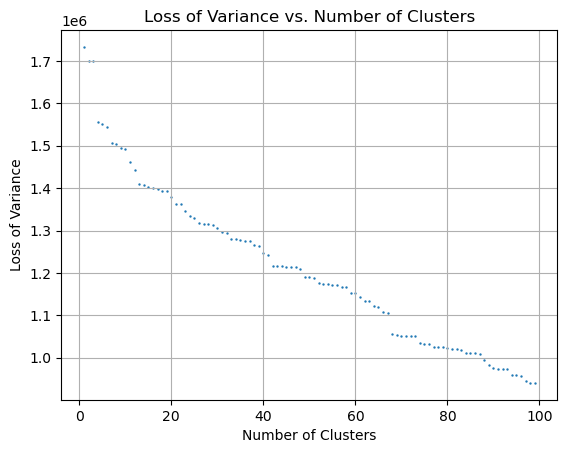

In [174]:

from sklearn.metrics import pairwise_distances

# Function to calculate the loss of variance
def calculate_loss_of_variance(clusters, data):
    loss = 0
    for cluster_id in np.unique(clusters):
        cluster_data = data.loc[clusters == cluster_id, data.columns != 'Cluster']
        centroid = cluster_data.mean(axis=0)
        cluster_loss = np.sum(pairwise_distances(cluster_data, [centroid])**2)
        loss += cluster_loss
    return loss

# Perform agglomerative clustering
n_clusters_range = range(1, 100)  # Define a range of cluster numbers to try
losses = []
num_clusters_left = []

for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(centroids.iloc[:,1:])
    loss = calculate_loss_of_variance(clusters, centroids)
    losses.append(loss)
    num_clusters_left.append(n_clusters)

    # print(f"After merging to {n_clusters} clusters, loss of variance: {loss}")

# Plotting loss of variance after every merge
plt.scatter(num_clusters_left, losses, marker='o', s=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss of Variance')
plt.title('Loss of Variance vs. Number of Clusters')
plt.grid(True)
plt.savefig(f'{data_path}plots/Loss_var__clusno.png', bbox_inches='tight', dpi=300)

plt.show()
# Significant drops in variance occur at merging to 20, 40 and 49


In [177]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours49
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)


<Figure size 2000x1000 with 0 Axes>

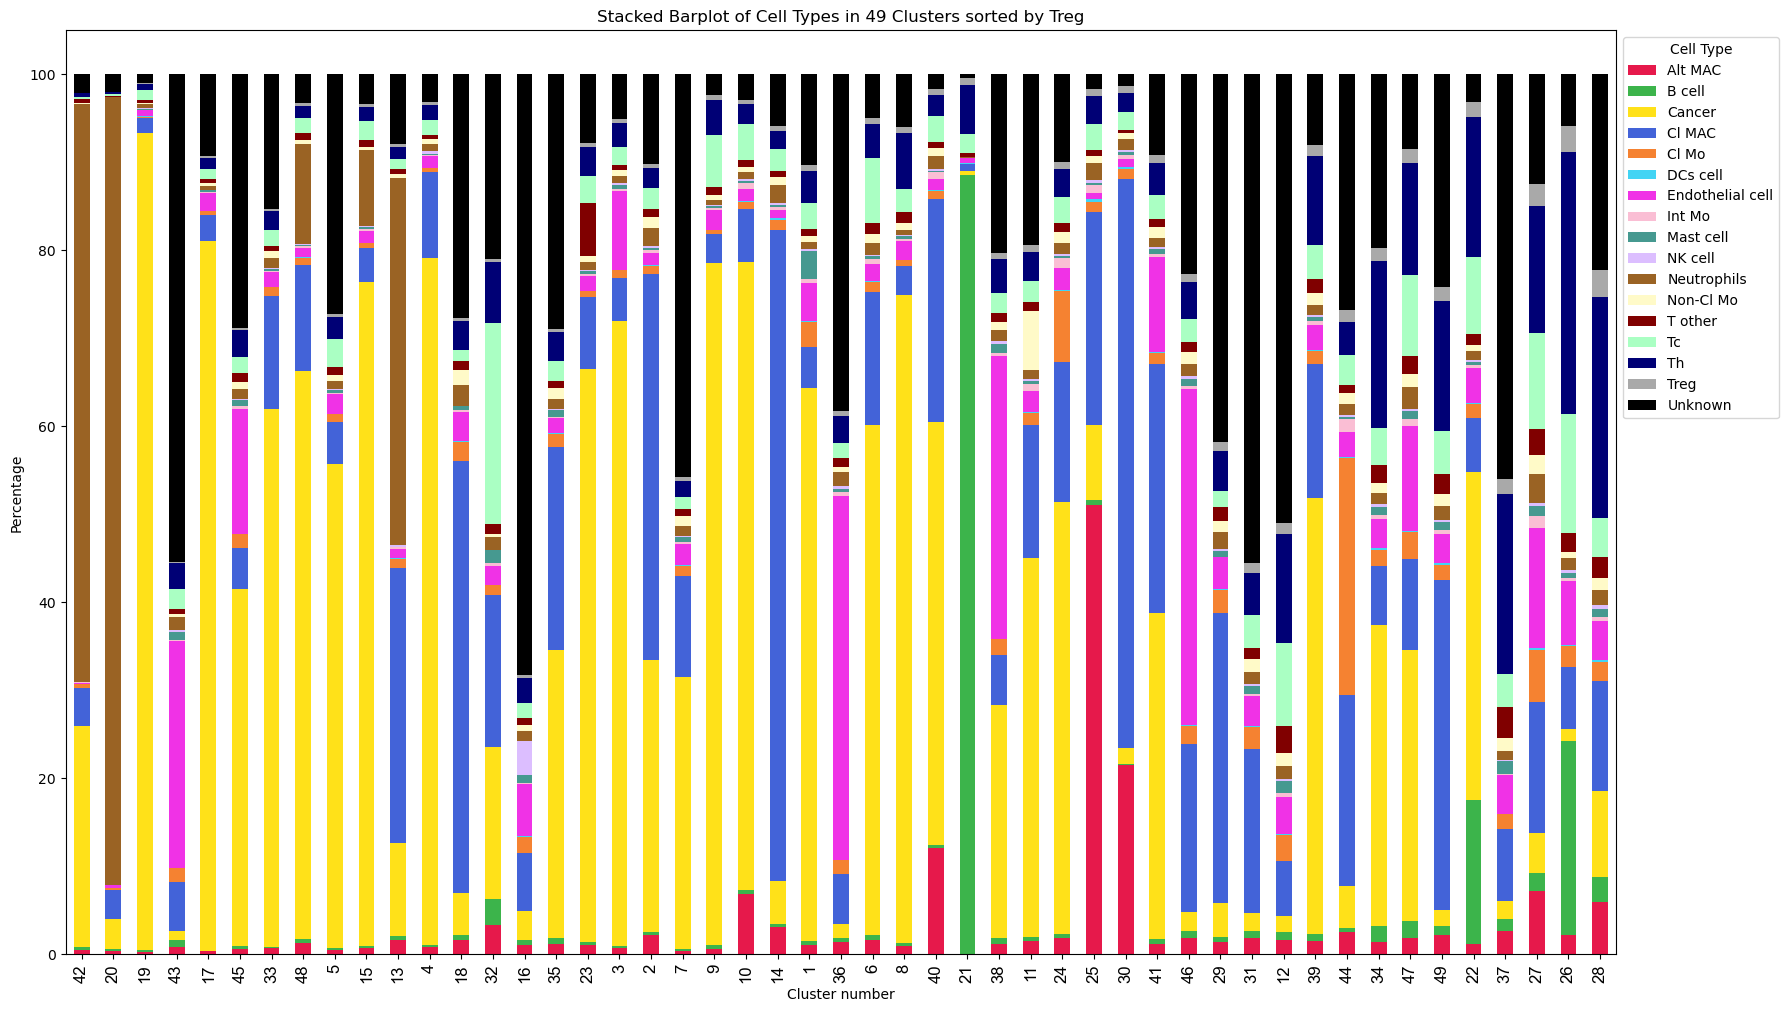

In [178]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [179]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours20
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)


<Figure size 2000x1000 with 0 Axes>

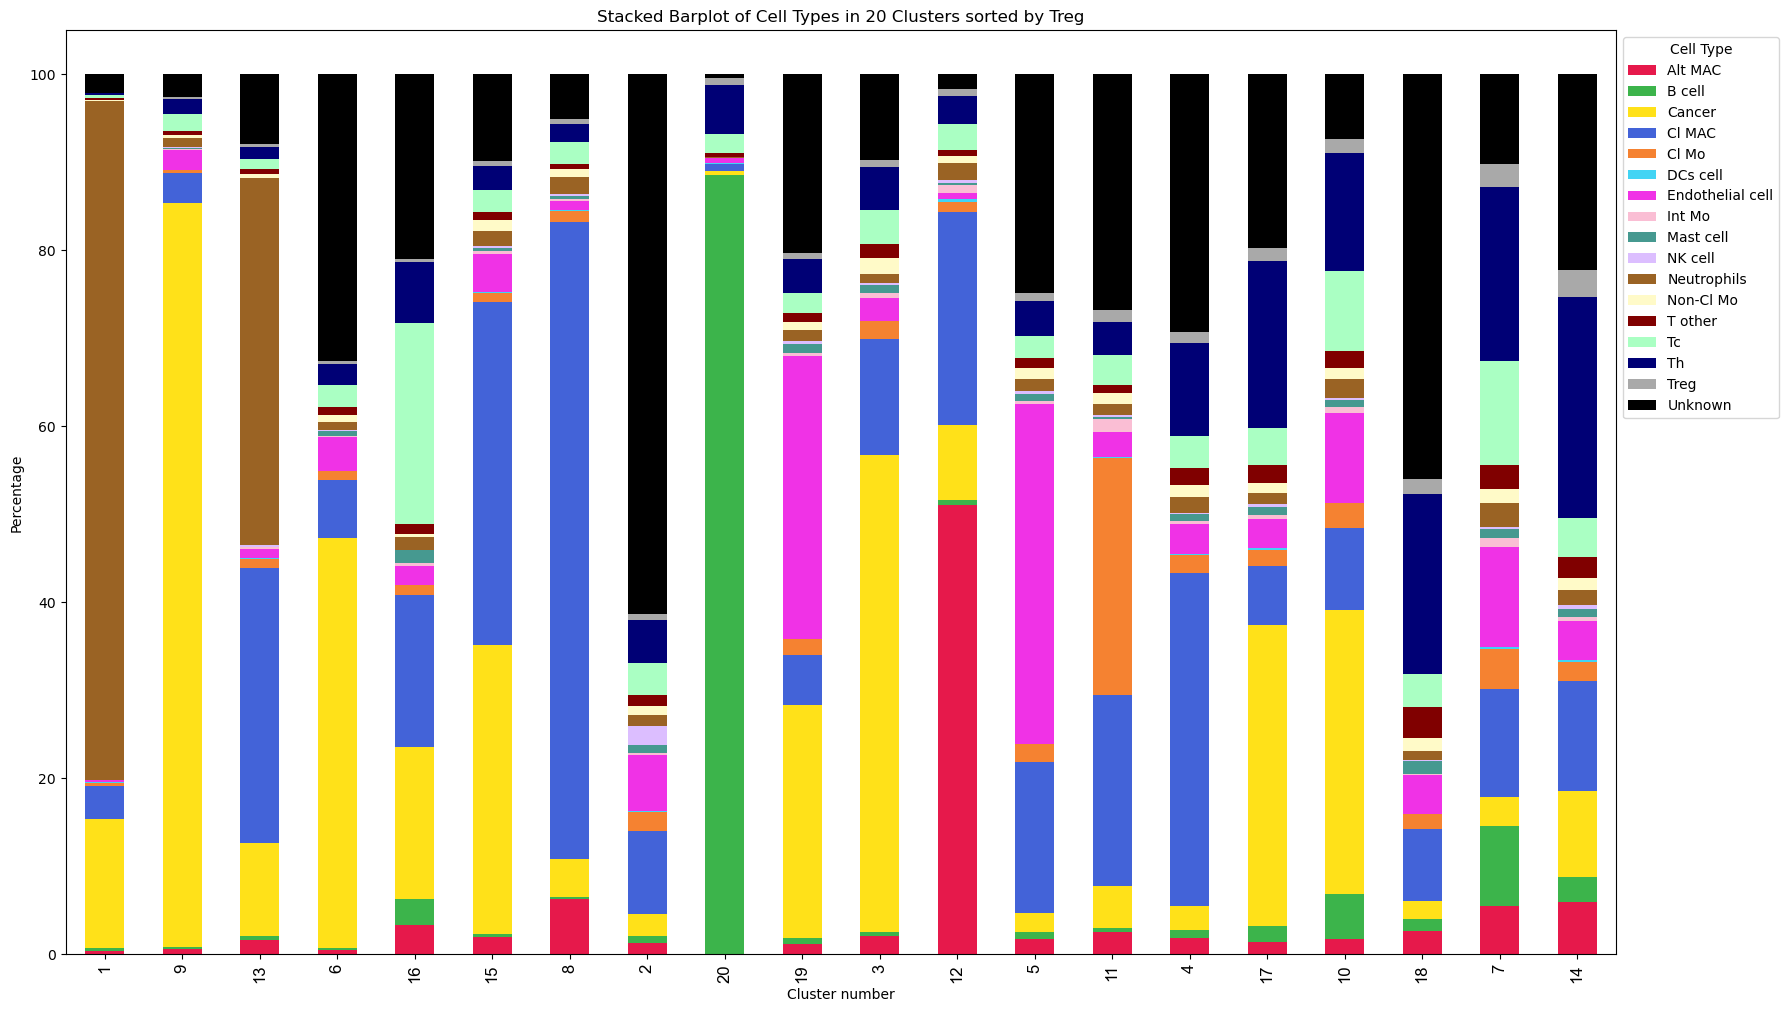

In [180]:
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)
# Sort by dendrogram
# result = result[clus_order]

# Add totals for each cell type and each cluster
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()

result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]


# Plotting
plt.figure(figsize=(20, 10))

ax = result_percentage.iloc[:-1,:-1].T.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
# plt.xticks(fontsize=3)
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=90, fontsize=3)

# Show plot
plt.legend(title='Cell Type', bbox_to_anchor=(1, 1))

plt.savefig(f'{data_path}plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)

plt.show()

In [190]:
average_neighbours40

,cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,agglomerateto_40
0,1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247,27
1,2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414,34
2,3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384,5
3,4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788,7
4,5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
271,272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000,19
272,273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000,19
273,274,0.000000,0.084654,0.914201,0.000000,0.000074,0.000069,0.000000,0.000000,0.000078,0.000287,0.000131,0.000000,0.000000,0.000000,0.000045,0.000000,0.000461,19


In [199]:
# num_clus = 20
key = average_neighbours20[['cluster', f'agglomerateto_20']]
df_clus = pd.merge(data, key, on='cluster', how='inner')
# num_clus = 40
key = average_neighbours40[['cluster', f'agglomerateto_40']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')
# num_clus = 49
key = average_neighbours49[['cluster', f'agglomerateto_49']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')


df_clus


,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster,agglomerateto_20,agglomerateto_40,agglomerateto_49
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.000000,0.0,0.000000,...,0.0,0.000000,0.166667,0.333333,0.0,0.000000,1,7,27,27
1,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.000000,0.0,0.083333,...,0.0,0.083333,0.083333,0.250000,0.0,0.333333,1,7,27,27
2,LUAD_D001,D001_1010,Unknown,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.000000,...,0.0,0.000000,0.333333,0.000000,0.0,0.166667,1,7,27,27
3,LUAD_D001,D001_1011,Unknown,0.000000,0.0,0.000000,0.181818,0.090909,0.0,0.000000,...,0.0,0.000000,0.363636,0.181818,0.0,0.181818,1,7,27,27
4,LUAD_D001,D001_1013,Unknown,0.142857,0.0,0.000000,0.000000,0.142857,0.0,0.071429,...,0.0,0.071429,0.071429,0.214286,0.0,0.285714,1,7,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D412,D412_1171,Cancer,0.000000,0.0,0.882353,0.058824,0.000000,0.0,0.000000,...,0.0,0.000000,0.058824,0.000000,0.0,0.000000,275,9,19,19
1637718,LUAD_D412,D412_1182,Cancer,0.000000,0.0,0.888889,0.055556,0.000000,0.0,0.000000,...,0.0,0.000000,0.055556,0.000000,0.0,0.000000,275,9,19,19
1637719,LUAD_D412,D412_1212,Cancer,0.000000,0.0,0.894737,0.052632,0.000000,0.0,0.000000,...,0.0,0.000000,0.052632,0.000000,0.0,0.000000,275,9,19,19
1637720,LUAD_D412,D412_3569,Cancer,0.000000,0.0,0.857143,0.071429,0.000000,0.0,0.000000,...,0.0,0.000000,0.071429,0.000000,0.0,0.000000,275,9,19,19


In [200]:
pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

def above_5(x):
    if x > 5:
        return 1
    else:
        return 0


pi['surv_5y'] = pi['Survival or loss to follow-up (years)'].apply(lambda x: above_5(x))
s5 = pi[['Key','surv_5y']].rename(columns={"Key":"Patient_ID"})
s5


,Patient_ID,surv_5y
0,LUAD_D001,1
1,LUAD_D002,1
2,LUAD_D003,0
3,LUAD_D004,0
4,LUAD_D005,1
...,...,...
411,LUAD_D412,1
412,LUAD_D413,1
413,LUAD_D414,1
414,LUAD_D415,0


In [201]:
df_clus = pd.merge(df_clus, s5, on='Patient_ID', how='inner')
df_clus.to_csv(f"{data_path}/clustered/full_cd_clus_20_40_49.csv", index = False)
df_clus

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,T.other,Tc,Th,Treg,Unknown,cluster,agglomerateto_20,agglomerateto_40,agglomerateto_49,surv_5y
0,LUAD_D001,D001_0,Cancer,0.166667,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,...,0.000000,0.166667,0.333333,0.0,0.000000,1,7,27,27,1
1,LUAD_D001,D001_1000,Treg,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,...,0.083333,0.083333,0.250000,0.0,0.333333,1,7,27,27,1
2,LUAD_D001,D001_1010,Unknown,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,...,0.000000,0.333333,0.000000,0.0,0.166667,1,7,27,27,1
3,LUAD_D001,D001_1011,Unknown,0.000000,0.000000,0.000000,0.181818,0.090909,0.0,0.000000,...,0.000000,0.363636,0.181818,0.0,0.181818,1,7,27,27,1
4,LUAD_D001,D001_1013,Unknown,0.142857,0.000000,0.000000,0.000000,0.142857,0.0,0.071429,...,0.071429,0.071429,0.214286,0.0,0.285714,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D213,D213_1771,Cancer,0.000000,0.076923,0.923077,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637718,LUAD_D213,D213_2703,Cancer,0.000000,0.090909,0.909091,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637719,LUAD_D213,D213_4040,Cancer,0.000000,0.100000,0.900000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637720,LUAD_D213,D213_4896,Cancer,0.000000,0.066667,0.933333,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1


In [202]:
df_clus['surv_5y'].value_counts()

surv_5y
1    1045247
0     592475
Name: count, dtype: int64